In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
mcdonalds = pd.read_csv('mcdonalds.csv')
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [5]:
mcdonalds.shape

(1453, 15)

In [6]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [7]:
MD_x = mcdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
np.round(MD_x.mean(axis=0), 2)

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [8]:
MD_pca = PCA()
MD_pca.fit(MD_x)

print(MD_pca.explained_variance_ratio_)
print(MD_pca.components_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03

In [9]:
std_devs = np.sqrt(MD_pca.explained_variance_)
print("Standard deviations (1, .., p=11):")
print(np.round(std_devs, 1))

print("\nRotation (n x k) = (11 x 11):")
components = MD_pca.components_.T 
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
rotation_df = pd.DataFrame(components, index=features, columns=[f'PC{i+1}' for i in range(11)])
print(rotation_df.round(3))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0

In [10]:
MD=mcdonalds.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

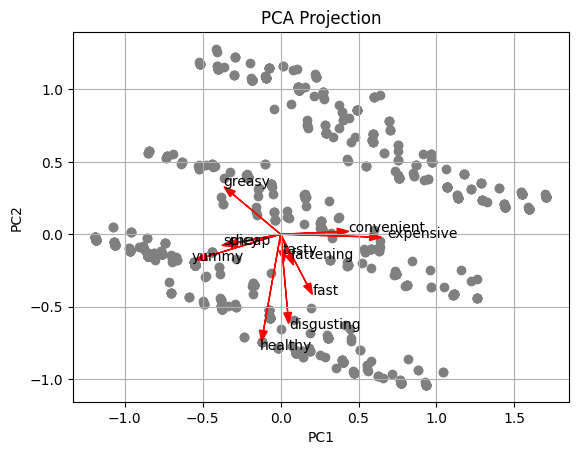

In [11]:
MD_pca = PCA()
MD_pca.fit(MD_x)

projected_data = MD_pca.transform(MD_x)

plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')

for i, (component, feature) in enumerate(zip(MD_pca.components_, mcdonalds.columns[:11])):
    plt.arrow(0, 0, component[0], component[1], color='red', head_width=0.05)
    plt.text(component[0] * 1.2, component[1] * 1.2, feature, color='black')

plt.grid(True)
plt.show()

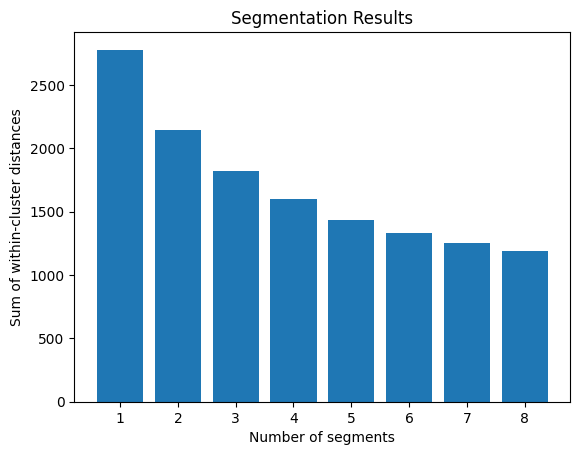

In [12]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

In [13]:
np.random.seed(1234)

cluster_range = range(2, 9)
n_rep = 10
n_boot = 100

boot_labels = {n: [] for n in cluster_range}

for n_clusters in cluster_range:
    for _ in range(n_rep):
        X_boot = resample(MD_x, replace=True, n_samples=len(MD_x))
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        kmeans.fit(X_boot)
        boot_labels[n_clusters].append(kmeans.labels_)

boot_labels_df = {n: pd.DataFrame(labels) for n, labels in boot_labels.items()}


In [14]:
MD_x = (mcdonalds == "Yes").astype(int).to_numpy() 

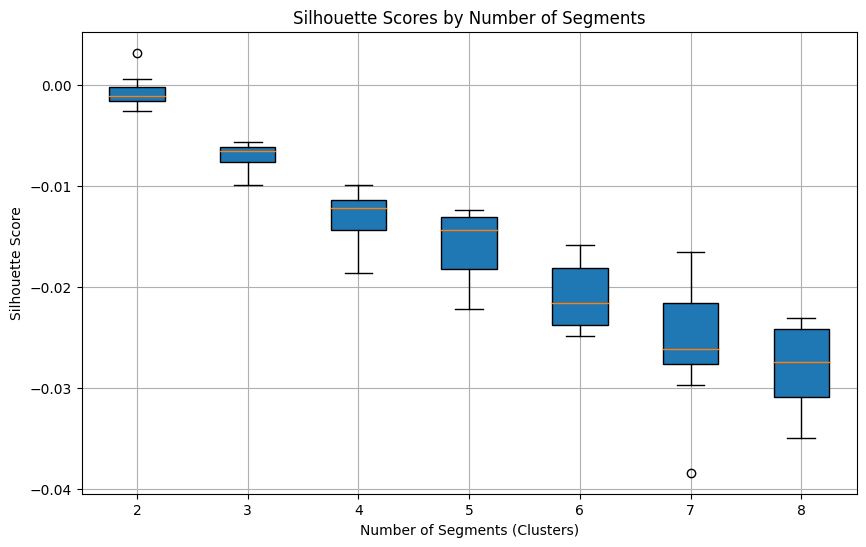

In [15]:
np.random.seed(1234)

cluster_range = range(2, 9)
n_rep = 10
n_boot = 100

boot_labels = {n: [] for n in cluster_range}

for n_clusters in cluster_range:
    for _ in range(n_rep):
        X_boot = resample(MD_x, replace=True, n_samples=len(MD_x))
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        kmeans.fit(X_boot)
        boot_labels[n_clusters].append(kmeans.labels_)

data_for_boxplot = {n: [] for n in cluster_range}

for n_clusters in cluster_range:
    for labels in boot_labels[n_clusters]:
        score = silhouette_score(MD_x, labels)
        data_for_boxplot[n_clusters].append(score)

boxplot_data = [data_for_boxplot[n] for n in cluster_range]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, vert=True, patch_artist=True)

plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores by Number of Segments')
plt.xticks(ticks=range(1, len(cluster_range) + 1), labels=cluster_range)
plt.grid(True)
plt.show()

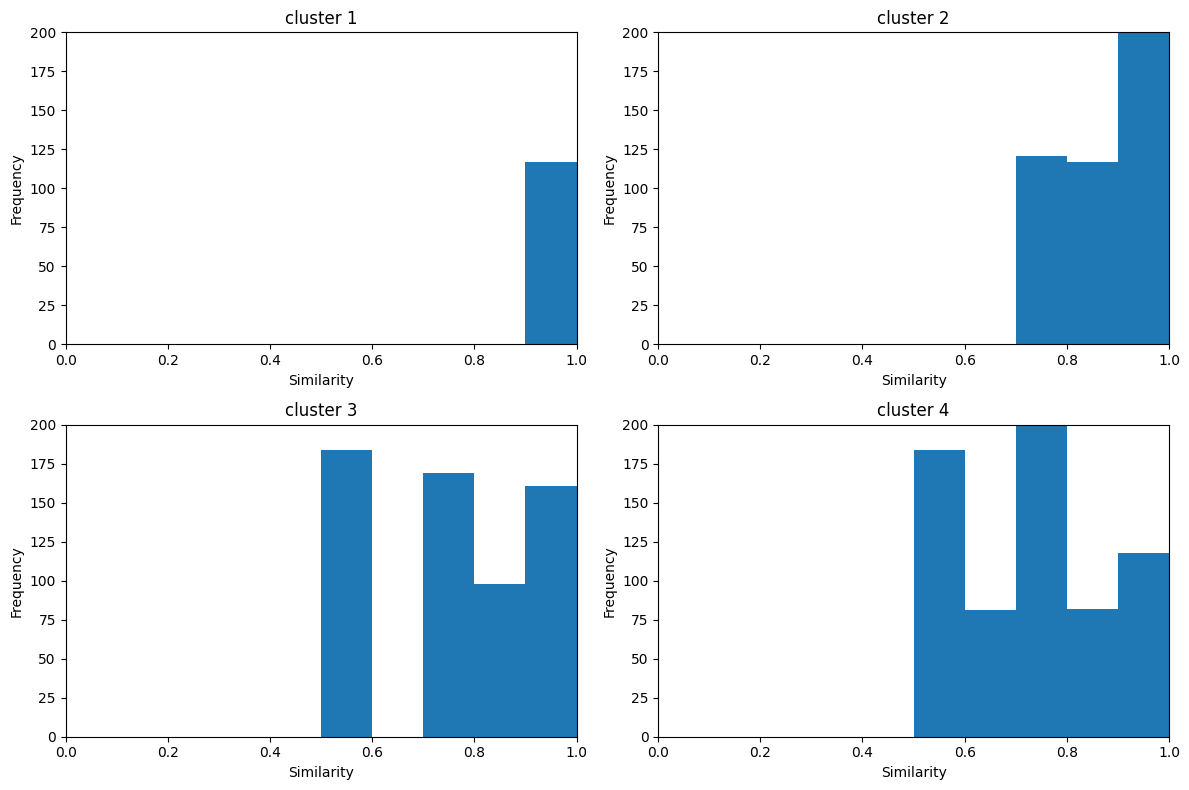

In [16]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

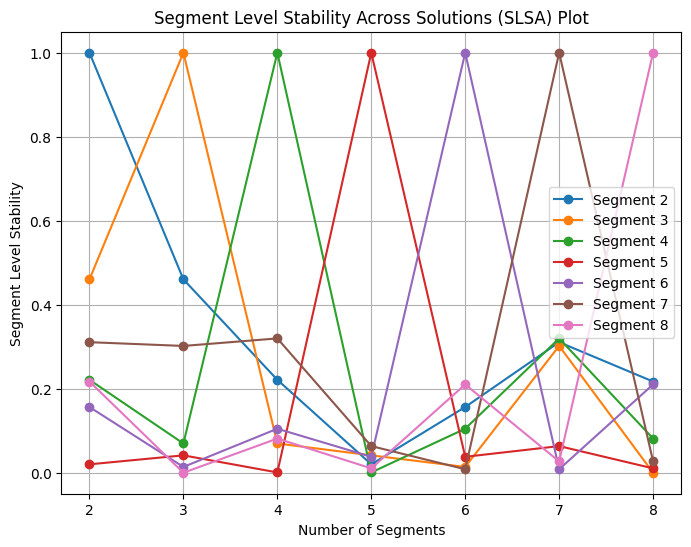

In [17]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

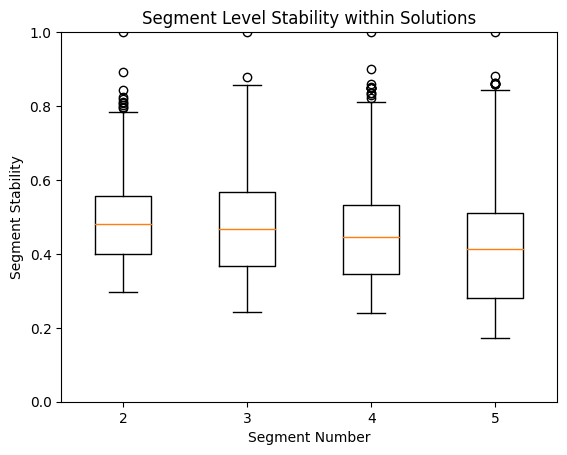

In [18]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [19]:
n_clusters_range = range(2, 9)
results = {}

np.random.seed(1234)

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    results[n_clusters] = gmm.predict(MD_x)

MD_m28 = results

for n_clusters in MD_m28:
    print(f"Cluster labels for {n_clusters} clusters: {MD_m28[n_clusters]}")

Cluster labels for 2 clusters: [0 0 0 ... 0 0 1]
Cluster labels for 3 clusters: [1 1 1 ... 1 1 2]
Cluster labels for 4 clusters: [1 3 3 ... 3 0 1]
Cluster labels for 5 clusters: [0 4 0 ... 2 2 3]
Cluster labels for 6 clusters: [5 5 1 ... 5 0 3]
Cluster labels for 7 clusters: [6 6 2 ... 6 3 4]
Cluster labels for 8 clusters: [2 5 0 ... 5 6 3]


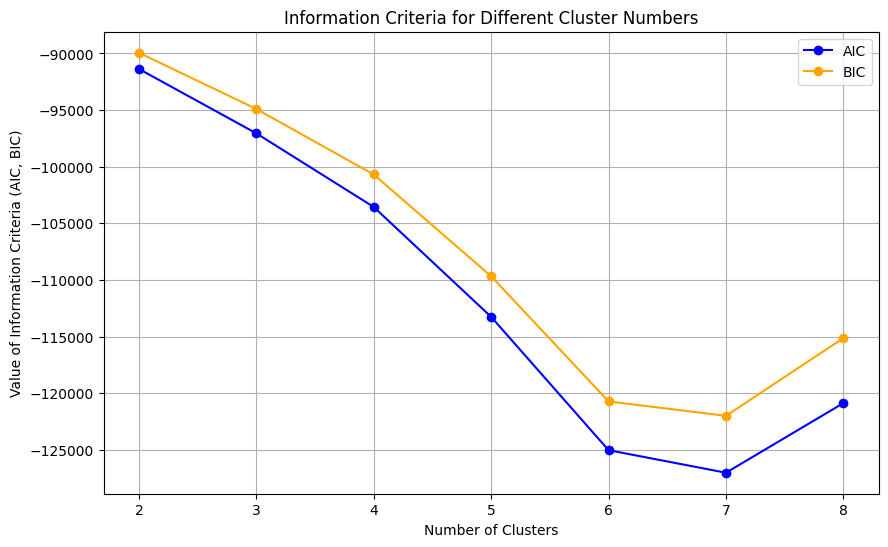

In [20]:
aic_values = []
bic_values = []
icl_values = []

n_clusters_range = range(2, 9)

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))

plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, aic_values, marker='o', label='AIC', color='blue')
plt.plot(n_clusters_range, bic_values, marker='o', label='BIC', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria (AIC, BIC)')
plt.title('Information Criteria for Different Cluster Numbers')
plt.xticks(n_clusters_range)
plt.grid()
plt.legend()
plt.show()

In [21]:
n_clusters = 4

kmeans_labels = results[4]

gmm = GaussianMixture(n_components=n_clusters, n_init=10, random_state=1234)
gmm.fit(MD_x)
gmm_labels = gmm.predict(MD_x)

confusion_mat = confusion_matrix(kmeans_labels, gmm_labels)

print("K-means vs Gaussian Mixture Model (4 Clusters):")
print(confusion_mat)

K-means vs Gaussian Mixture Model (4 Clusters):
[[178   0   0   0]
 [  0 268   0   0]
 [  0   0 630   0]
 [  0   0   0 377]]


In [23]:
mcdonalds['Like'] = mcdonalds['Like'].str.extract('(\d+)')[0]
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')
mcdonalds = mcdonalds.dropna(subset=['Like'])

like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)

mcdonalds['Like_n'] = 6 - mcdonalds['Like'].astype(int)

like_n_counts = mcdonalds['Like_n'].value_counts().sort_index()

print("Reversed Like Counts:")
print(like_counts)

print("\nLike.n Counts:")
print(like_n_counts)

Reversed Like Counts:
Like
5    295
4    231
3    302
2    246
1    210
0    169
Name: count, dtype: int64

Like.n Counts:
Like_n
1    295
2    231
3    302
4    246
5    210
6    169
Name: count, dtype: int64


In [24]:
f = ' + '.join(mcdonalds.columns[0:11])
f = f'Like_n ~ {f}'

print(f)

Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


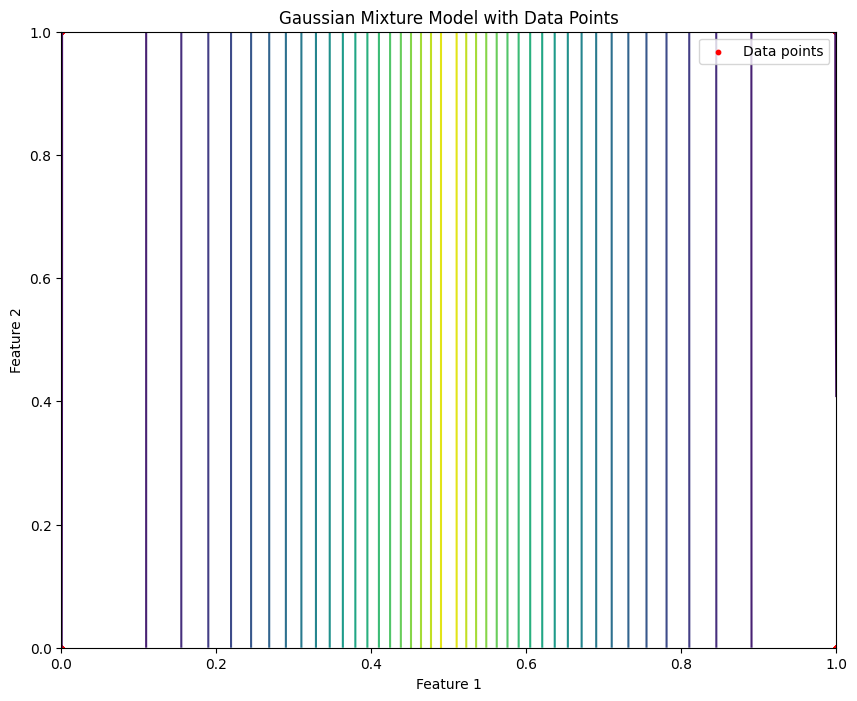

In [27]:
for column in mcdonalds.columns[0:11]:
    le = LabelEncoder()
    mcdonalds[column] = le.fit_transform(mcdonalds[column])

X = mcdonalds.iloc[:, 0:11].values
feature_1 = 0
feature_2 = 1
X_plot = X[:, [feature_1, feature_2]]

gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_plot)

x = np.linspace(X_plot[:, 0].min(), X_plot[:, 0].max(), 100)
y = np.linspace(X_plot[:, 1].min(), X_plot[:, 1].max(), 100)
X1, X2 = np.meshgrid(x, y)
XX = np.array([X1.ravel(), X2.ravel()]).T

Z = -gmm.score_samples(XX)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(10, 8))
plt.contour(X1, X2, Z, levels=20, cmap='viridis')
plt.scatter(X_plot[:, 0], X_plot[:, 1], c='red', s=10, label='Data points')
plt.title('Gaussian Mixture Model with Data Points')
plt.xlabel(f'Feature {feature_1 + 1}')
plt.ylabel(f'Feature {feature_2 + 1}')
plt.legend()
plt.show()

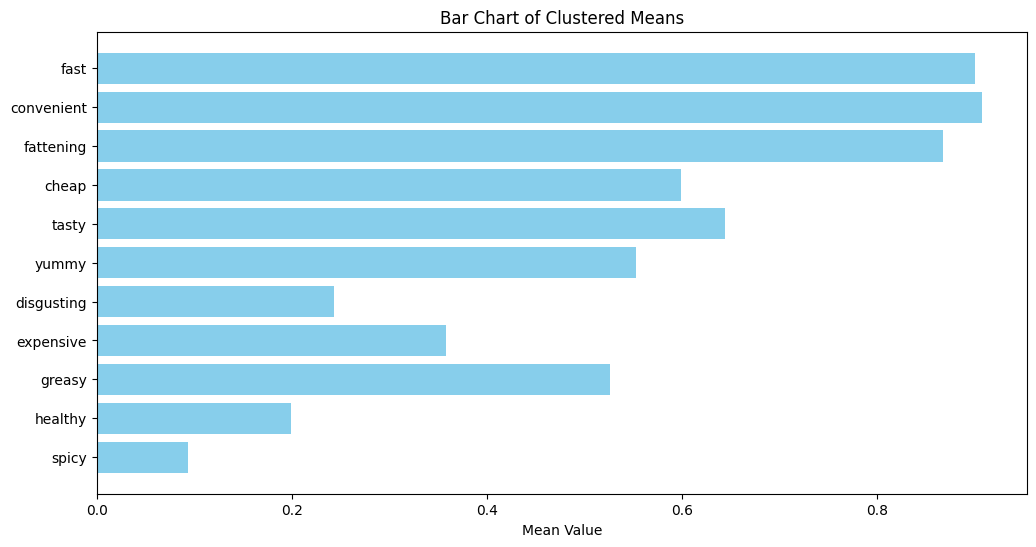

In [28]:
MD_x = mcdonalds.iloc[:, 0:11].values

MD_vclust = linkage(MD_x.T, method='ward')
dendro = dendrogram(MD_vclust, no_plot=True)
order = dendro['leaves']

mean_values = np.mean(MD_x, axis=0)

plt.figure(figsize=(12, 6))
plt.barh(np.arange(len(mean_values)), mean_values[order], color='skyblue')
plt.yticks(np.arange(len(mean_values)), mcdonalds.columns[0:11][order])
plt.xlabel('Mean Value')
plt.title('Bar Chart of Clustered Means')
plt.show()

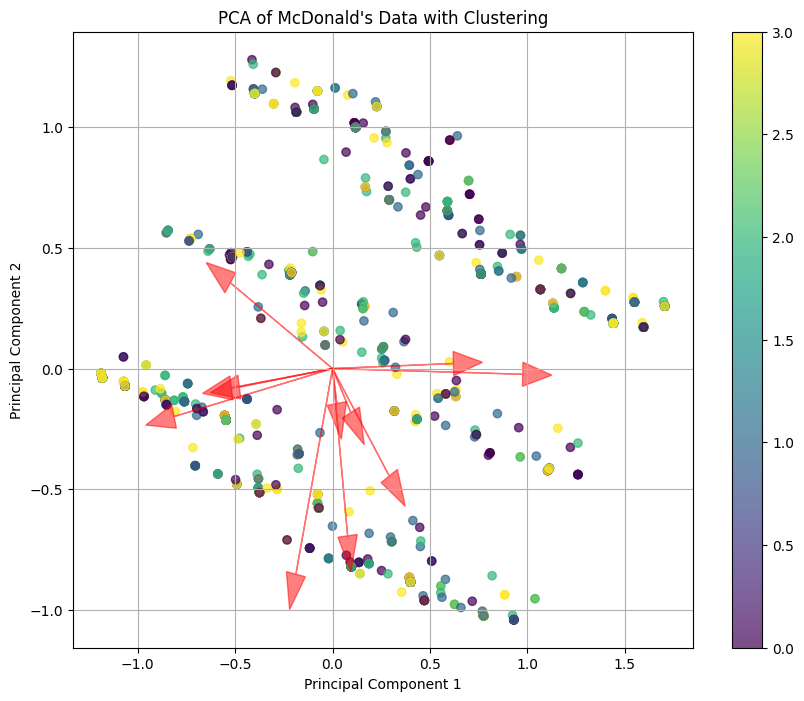

In [29]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

MD_k4 = np.random.randint(0, 4, size=MD_x.shape[0])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald\'s Data with Clustering')

for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[i, 0] * max(MD_pca[:, 0]), pca.components_[i, 1] * max(MD_pca[:, 1]),
              color='r', alpha=0.5, head_width=0.1)

plt.grid()
plt.colorbar(scatter)
plt.show()

In [34]:
import seaborn as sns

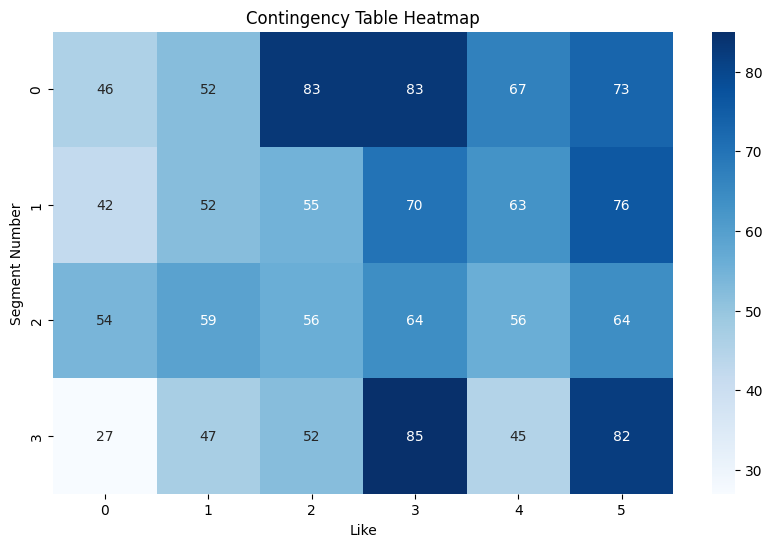

In [35]:
MD_k4 = np.random.randint(0, 4, size=MD_x.shape[0])  # Replace with actual cluster assignments

k4 = MD_k4

contingency_table = pd.crosstab(k4, mcdonalds['Like'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table Heatmap')
plt.xlabel('Like')
plt.ylabel('Segment Number')
plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

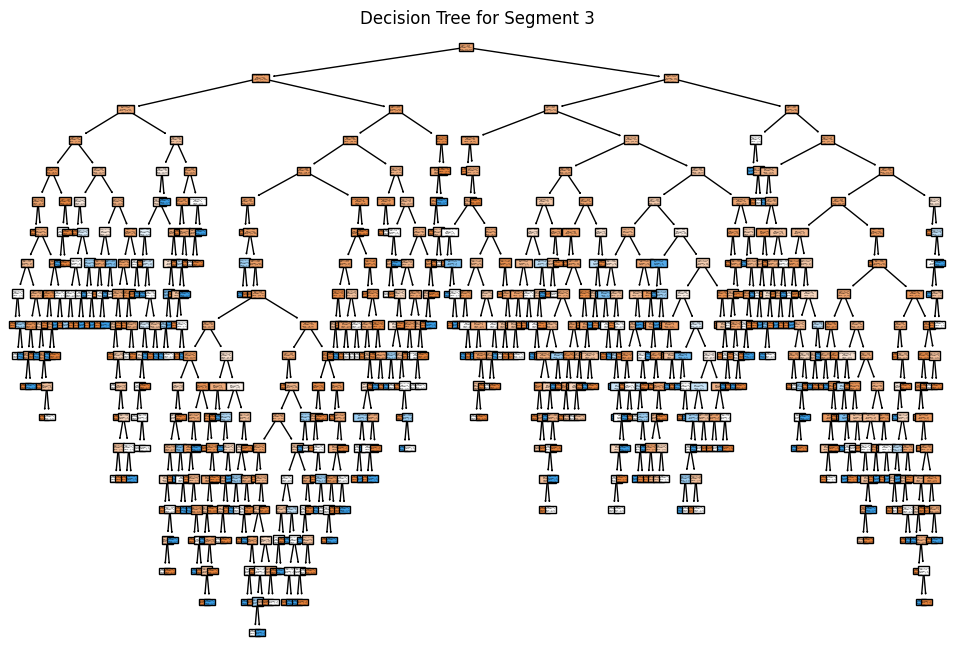

In [39]:
label_encoders = {}
categorical_columns = ['VisitFrequency', 'Gender']

for column in categorical_columns:
    le = LabelEncoder()
    mcdonalds[column] = le.fit_transform(mcdonalds[column])
    label_encoders[column] = le

X = mcdonalds[['Like_n', 'Age', 'VisitFrequency', 'Gender']]
y = (MD_k4 == 3).astype(int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not 3', '3'])
plt.title('Decision Tree for Segment 3')
plt.show()

In [40]:
visit = mcdonalds.groupby(MD_k4)['VisitFrequency'].mean()
visit


0    2.643564
1    2.589385
2    2.804533
3    2.508876
Name: VisitFrequency, dtype: float64

In [41]:
like = mcdonalds.groupby(MD_k4)['Like_n'].mean()
like

0    3.277228
1    3.195531
2    3.430595
3    3.053254
Name: Like_n, dtype: float64

In [42]:
female = mcdonalds.groupby(MD_k4)['Gender'].apply(lambda x: (x == 'Female').mean())
female

0    0.0
1    0.0
2    0.0
3    0.0
Name: Gender, dtype: float64

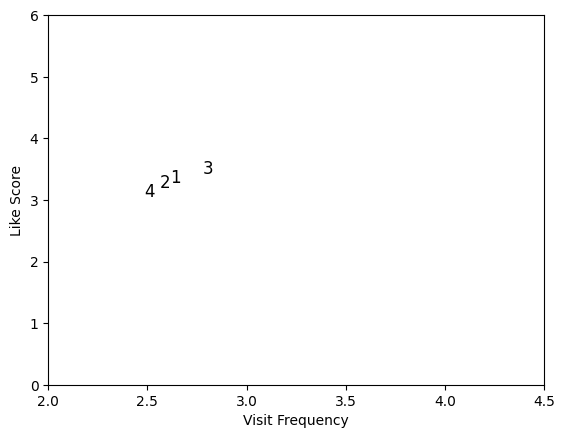

In [45]:
plt.scatter(visit, like, s=10 * female, alpha=0.5)
plt.xlim(2, 4.5)
plt.ylim(0,6)

for i, (x, y) in enumerate(zip(visit, like), 1):
    plt.text(x, y, str(i), fontsize=12, ha='center')

plt.xlabel('Visit Frequency')
plt.ylabel('Like Score')
plt.show()